In [9]:
# 1. Distance of trip plays a role in the amount of revenue our ride sharing service receives from a trip.  Though people in Urban areas are the majority of fares, fares from those in suburban areas account for 62.7 percent of total fares for the company
# 2. The suburbs supply the vast majority of drivers to our company.  86.7 percent of drivers for our company are from the suburbs.
# 3. This is likely because of the higher likelihood of connecting with a rider in the suburbs.  Suburban rides accounted for 68.4 percent of total rides for our company.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
# Display the data table
pyber_df.head(25)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


<function matplotlib.pyplot.show(*args, **kw)>

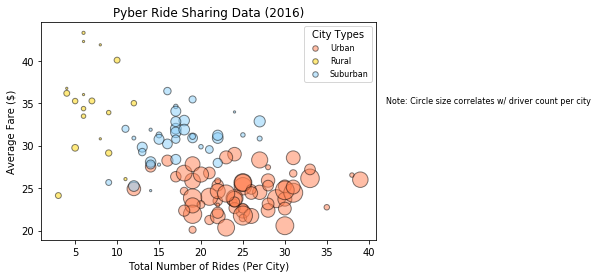

In [6]:
# Obtain the data frames for the city type(urban_rural,suburban) and then group the data frames by city
urban_city_type = pyber_df[pyber_df['type'] == 'Urban'].groupby([pyber_df['city']])
rural_city_type = pyber_df[pyber_df['type'] == 'Rural'].groupby([pyber_df['city']])
suburban_city_type = pyber_df[pyber_df['type'] == 'Suburban'].groupby([pyber_df['city']])

# Urban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_urban = urban_city_type['ride_id'].count()
y_urban = urban_city_type['fare'].mean()
s_urban = urban_city_type['driver_count'].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size)
x_rural = rural_city_type['ride_id'].count()
y_rural = rural_city_type['fare'].mean()
s_rural = rural_city_type['driver_count'].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_suburban = suburban_city_type['ride_id'].count()
y_suburban = suburban_city_type['fare'].mean()
s_suburban = suburban_city_type['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = 'Urban', s=s_urban * 5, color=['coral'], edgecolor='black', alpha=0.5, marker='o')
plt.scatter(x_rural, y_rural, label = 'Rural', s=s_rural * 5, color=['gold'], edgecolor='black', alpha=0.5, marker='o')
plt.scatter(x_suburban, y_suburban, label = 'Suburban', s=s_suburban * 5, color=['lightskyblue'], edgecolor='black', alpha=0.5, marker='o')

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legend = plt.legend(fontsize = 8, title = 'City Types', loc= 'best')

# Adjust the legend
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note: Circle size correlates w/ driver count per city', fontsize = 8)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig('PyberRideSharingData.png', bbox_inches='tight')
# Show plot
plt.show

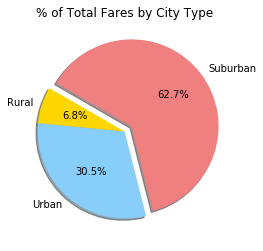

In [8]:
# Calculate Type Percents
type_grouped = pyber_df.groupby(['type'])
fare_sum = type_grouped['fare'].sum()

# Build Pie Chart
labels = ['Rural', 'Urban', 'Suburban']
explode = (0, 0, .1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 150)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Total Fares By City Type.png')

# Show Figure
plt.show()

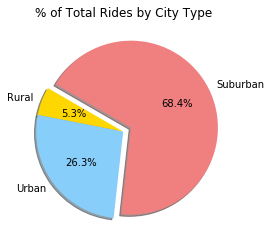

In [6]:
# Calculate Type Percents
type_grouped = pyber_df.groupby(['type'])
rides = type_grouped['ride_id'].count()

# Build Pie Chart
labels = ['Rural', 'Urban', 'Suburban']
explode = (0, 0, .1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Total Rides By City Type.png')

# Show Figure
plt.show()

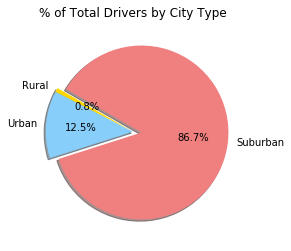

In [7]:
# Calculate Type Percents
type_grouped_drivers = pyber_df.groupby(['type'])
drivers_sum = type_grouped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ['Rural', 'Urban', 'Suburban']
explode = (0, 0, .1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Total Drivers By City Type.png')

# Show Figure
plt.show()